Variable Notes

- **pclass**: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower

- **age**: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

- **sibsp**: The dataset defines family relations in the following way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch**: The dataset defines family relations in the following way:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny, therefore `parch=0` for them.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


i will drop columns that i do not need (name,cabin,passengerid)

In [4]:
df.drop(['Name','PassengerId','Cabin','Ticket'],axis=1,inplace=True)

In [5]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Next i will replace nulls in Embarked column with random values to keep there ratio

In [7]:
emvalue_counts=df.Embarked.value_counts()

In [8]:
# Calculate the ratio of each value to the total count
value_ratios = emvalue_counts / emvalue_counts.sum()

# Generate random samples based on the ratios
null_count = df['Embarked'].isnull().sum()
null_samples = np.random.choice(value_ratios.index, size=null_count, p=value_ratios.values)

# Replace the null values with the random samples
df.loc[df['Embarked'].isnull(), 'Embarked'] = null_samples

In [9]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### some visuals

<Axes: xlabel='Survived', ylabel='count'>

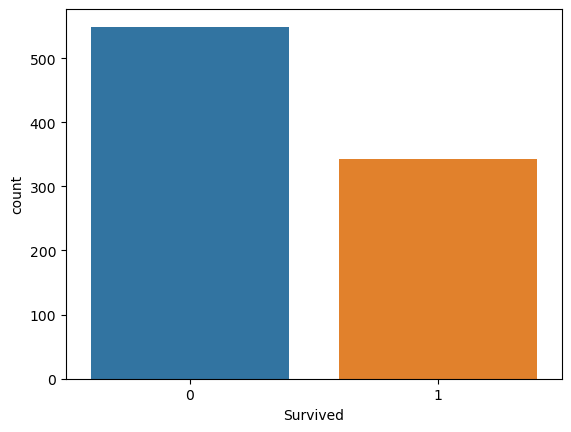

In [15]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

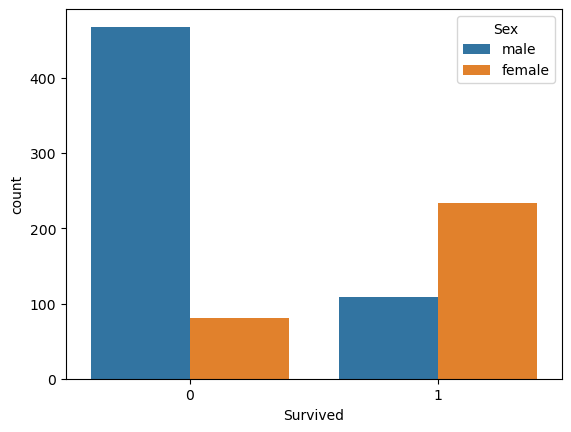

In [16]:
sns.countplot(x='Survived',data=df,hue='Sex')

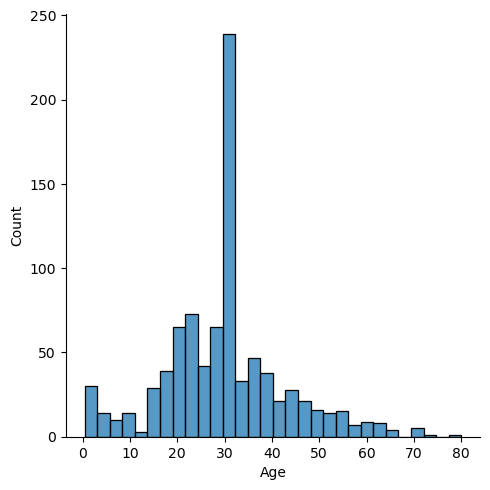

In [18]:
sns.displot(x='Age',data=df)

<Axes: xlabel='Survived', ylabel='count'>

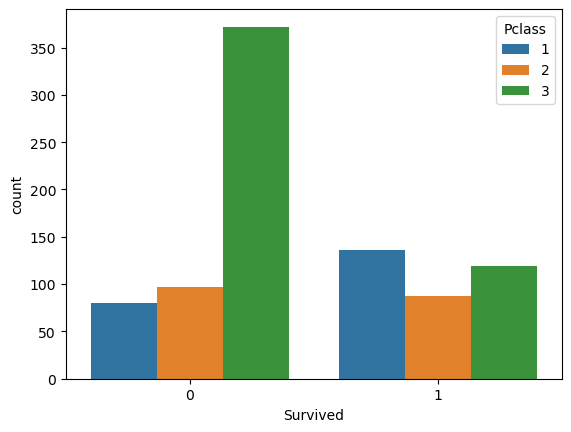

In [19]:
sns.countplot(x='Survived',hue='Pclass',data=df)

### encoding

In [22]:
# converting sex column from object to numeric values
sex=pd.get_dummies(df.Sex,drop_first=True)

In [23]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
# converting Embarked column from object to numeric values
embarked=pd.get_dummies(df.Embarked)

In [25]:
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [26]:
df=pd.concat([sex,embarked,df],axis=1)

In [27]:
df

,male,C,Q,S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0,1,0,3,male,22.000000,1,0,7.2500,S
1,0,1,0,0,1,1,female,38.000000,1,0,71.2833,C
2,0,0,0,1,1,3,female,26.000000,0,0,7.9250,S
3,0,0,0,1,1,1,female,35.000000,1,0,53.1000,S
4,1,0,0,1,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,1,0,2,male,27.000000,0,0,13.0000,S
887,0,0,0,1,1,1,female,19.000000,0,0,30.0000,S
888,0,0,0,1,0,3,female,29.699118,1,2,23.4500,S
889,1,1,0,0,1,1,male,26.000000,0,0,30.0000,C


In [28]:
df.drop(['Sex','Embarked'],inplace=True,axis=1)

In [29]:
df.head()

,male,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,0,1,0,3,22.0,1,0,7.2500
1,0,1,0,0,1,1,38.0,1,0,71.2833
2,0,0,0,1,1,3,26.0,0,0,7.9250
3,0,0,0,1,1,1,35.0,1,0,53.1000
4,1,0,0,1,0,3,35.0,0,0,8.0500


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   male      891 non-null    uint8  
 1   C         891 non-null    uint8  
 2   Q         891 non-null    uint8  
 3   S         891 non-null    uint8  
 4   Survived  891 non-null    int64  
 5   Pclass    891 non-null    int64  
 6   Age       891 non-null    float64
 7   SibSp     891 non-null    int64  
 8   Parch     891 non-null    int64  
 9   Fare      891 non-null    float64
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


### spliting data

In [31]:
from sklearn.model_selection import train_test_split
x=df.drop(['Survived'],axis=1)
y=df.Survived

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=40)


In [35]:
def train (model,model_name):
    model.fit(x_train, y_train)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")


### modeling

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

### logistic Regression

In [36]:
log=LogisticRegression()
train(log,'Logistic regression')

Logistic regression model score on Training data: 80.38922155688623%
Logistic regression model score on Testing data: 80.71748878923766%


D:\jupyter\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# SVM
svm_model = SVC()

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()

# Decision Tree
dt_model = DecisionTreeClassifier()

###  SVM

In [39]:
train(svm_model,'SVM')

SVM model score on Training data: 68.562874251497%
SVM model score on Testing data: 67.2645739910314%


### K-Nearest Neighbors

In [40]:
train(knn_model,'K-Nearest Neighbors')

K-Nearest Neighbors model score on Training data: 80.38922155688623%
K-Nearest Neighbors model score on Testing data: 68.16143497757847%


### Decision Tree

In [41]:
train(dt_model,'Decision Tree')

Decision Tree model score on Training data: 98.20359281437125%
Decision Tree model score on Testing data: 77.13004484304933%


### Random forest

In [43]:
random=RandomForestClassifier()
train(random,'RandomForestClassifier')

RandomForestClassifier model score on Training data: 98.20359281437125%
RandomForestClassifier model score on Testing data: 82.0627802690583%


### Naive bayes

In [44]:
naive=GaussianNB()
train(naive,'Naive bayes')

Naive bayes model score on Training data: 79.19161676646706%
Naive bayes model score on Testing data: 79.37219730941703%


### neural network

In [45]:
neural=MLPClassifier()
train(neural,'neural network')

neural network model score on Training data: 81.1377245508982%
neural network model score on Testing data: 80.71748878923766%


### Gradient Boosting model

In [46]:
gradient=GradientBoostingClassifier()
train(gradient,'GradientBoostingClassifier')

GradientBoostingClassifier model score on Training data: 90.71856287425149%
GradientBoostingClassifier model score on Testing data: 82.51121076233184%


### Linear Discriminant Analysis (LDA)

In [47]:
lda=LinearDiscriminantAnalysis()
train(lda,'LinearDiscriminantAnalysis')

LinearDiscriminantAnalysis model score on Training data: 79.79041916167665%
LinearDiscriminantAnalysis model score on Testing data: 80.71748878923766%


### Quadratic Discriminant Analysis (QDA)

In [48]:
qda=QuadraticDiscriminantAnalysis()
train(qda,'QuadraticDiscriminantAnalysis')

QuadraticDiscriminantAnalysis model score on Training data: 65.11976047904191%
QuadraticDiscriminantAnalysis model score on Testing data: 66.81614349775785%


D:\jupyter\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
